In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [3]:
df_result=pd.read_csv('results.csv',encoding='utf-8',sep=',')

In [4]:
df_races=pd.read_csv('races.csv',encoding='utf-8',sep=',')

In [5]:
df_drivers=pd.read_csv('drivers.csv',encoding='utf-8',sep=',')

In [6]:
df_constructor=pd.read_csv('constructors.csv',encoding='utf-8',sep=',')

In [7]:
df_constructor

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [8]:
df_status=pd.read_csv('status.csv',encoding='utf-8',sep=',')

In [9]:
df_sprint=pd.read_csv('sprint_results.csv',encoding='utf-8',sep=',')

In [10]:
df_races.year=df_races.year.astype(str)

In [11]:
df_races2022=df_races[df_races['year']=='2023']

In [12]:
df_result['driverName']=df_result['driverId'].map(df_drivers.set_index('driverId')['surname'])

In [13]:
df_races2022.tail()

,raceId,year,round,circuitId,name,...,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1096,1116,2023,18,69,United States Grand Prix,...,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,...,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,...,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,...,04:30:00,2023-11-18,08:00:00,\N,\N
1100,1120,2023,22,24,Abu Dhabi Grand Prix,...,10:30:00,2023-11-25,14:00:00,\N,\N


In [14]:
df_result['constructorName']=df_result['constructorId'].map(df_constructor.set_index('constructorId')['name'])

In [15]:
df_result['statusDescription']=df_result['statusId'].map(df_status.set_index('statusId')['status'])

In [16]:
df_result['gpName']=df_result['raceId'].map(df_races2022.set_index('raceId')['name'])
df_result['gpDate']=df_result['raceId'].map(df_races2022.set_index('raceId')['date'])
df_result['gpYear']=df_result['raceId'].map(df_races2022.set_index('raceId')['year'])

In [17]:
df_result.gpName.value_counts()

gpName
Bahrain Grand Prix          20
Saudi Arabian Grand Prix    20
Australian Grand Prix       20
Azerbaijan Grand Prix       20
Miami Grand Prix            20
                            ..
Hungarian Grand Prix        20
Belgian Grand Prix          20
Dutch Grand Prix            20
Italian Grand Prix          20
Singapore Grand Prix        20
Name: count, Length: 15, dtype: int64

In [18]:
df_result=df_result.dropna(axis=0)

In [19]:
df_result['position']=df_result['position'].replace(['\\N'],'21')
df_result.position=df_result.position.astype(int)
df_result['fastestLapTime']=df_result['fastestLapTime'].replace(['\\N'],0)

In [20]:
df_result[df_result['gpYear']=='2023']

,resultId,raceId,driverId,constructorId,number,...,constructorName,statusDescription,gpName,gpDate,gpYear
25840,25846,1098,830,9,1,...,Red Bull,Finished,Bahrain Grand Prix,2023-03-05,2023
25841,25847,1098,815,9,11,...,Red Bull,Finished,Bahrain Grand Prix,2023-03-05,2023
25842,25848,1098,4,117,14,...,Aston Martin,Finished,Bahrain Grand Prix,2023-03-05,2023
25843,25849,1098,832,6,55,...,Ferrari,Finished,Bahrain Grand Prix,2023-03-05,2023
25844,25850,1098,1,131,44,...,Mercedes,Finished,Bahrain Grand Prix,2023-03-05,2023
...,...,...,...,...,...,...,...,...,...,...,...
26135,26141,1113,847,131,63,...,Mercedes,Accident,Singapore Grand Prix,2023-09-17,2023
26136,26142,1113,822,51,77,...,Alfa Romeo,Technical,Singapore Grand Prix,2023-09-17,2023
26137,26143,1113,839,214,31,...,Alpine F1 Team,Gearbox,Singapore Grand Prix,2023-09-17,2023
26138,26144,1113,852,213,22,...,AlphaTauri,Collision,Singapore Grand Prix,2023-09-17,2023


In [21]:
df_MaxHam=df_result[(df_result['driverName']=='Verstappen')|(df_result['driverName']=='Leclerc')|(df_result['driverName']=='Sainz')|(df_result['driverName']=='Russell')|(df_result['driverName']=='Leclerc')|(df_result['driverName']=='Pérez')|(df_result['driverName']=='Hamilton')]



In [22]:
df_MaxHam2=df_result[(df_result['driverName']=='Verstappen')|(df_result['driverName']=='Pérez')]



In [23]:
df_Standing=df_result.groupby(by='driverName')['points'].sum('points').sort_values( ascending=True)

In [24]:
df_Standing=pd.DataFrame(df_Standing)

In [25]:
df_Standing=df_Standing.reset_index()

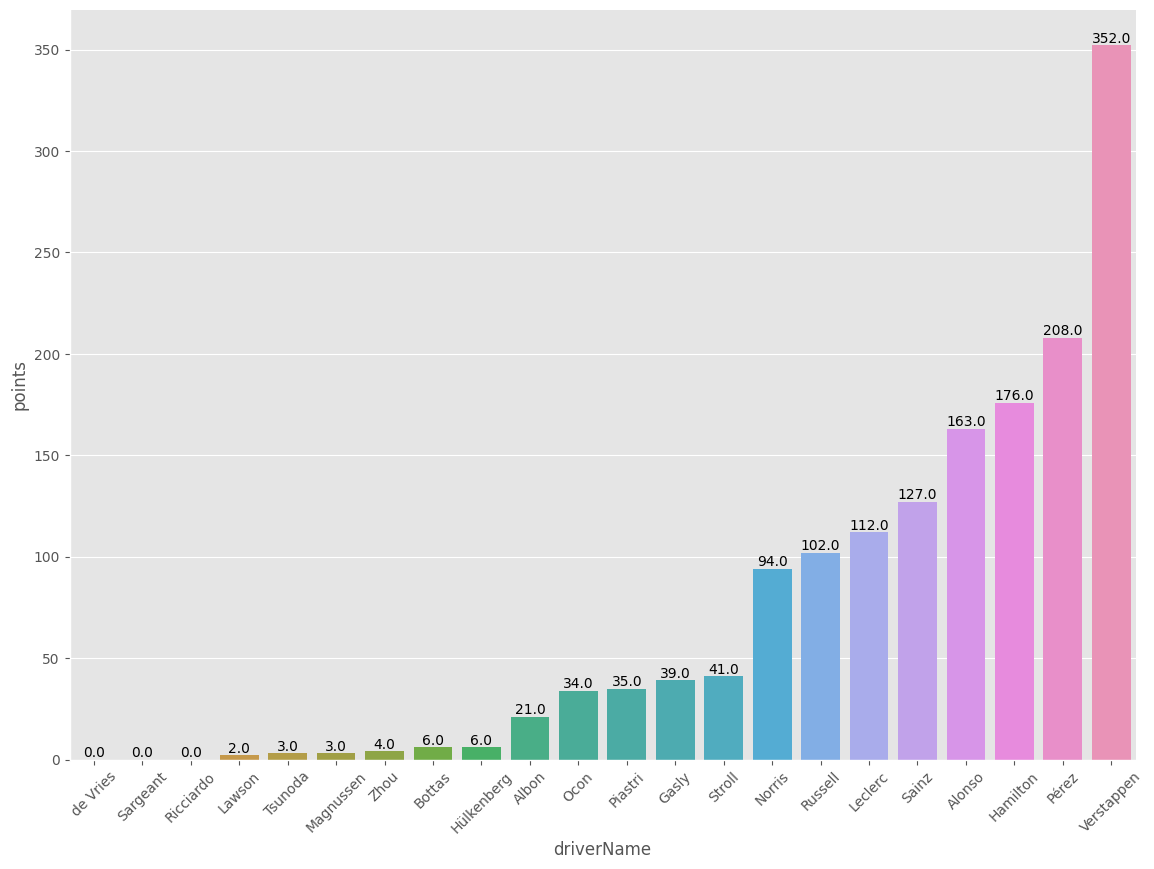

In [26]:
g=sns.catplot(x='driverName',y='points',data=df_Standing,kind='bar', height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() / 1):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

In [27]:
df_Standing.columns

Index(['driverName', 'points'], dtype='object')

In [28]:
df_result = df_result.reset_index()

In [29]:
df_result[df_result['raceId']>=1098]

,index,resultId,raceId,driverId,constructorId,...,constructorName,statusDescription,gpName,gpDate,gpYear
0,25840,25846,1098,830,9,...,Red Bull,Finished,Bahrain Grand Prix,2023-03-05,2023
1,25841,25847,1098,815,9,...,Red Bull,Finished,Bahrain Grand Prix,2023-03-05,2023
2,25842,25848,1098,4,117,...,Aston Martin,Finished,Bahrain Grand Prix,2023-03-05,2023
3,25843,25849,1098,832,6,...,Ferrari,Finished,Bahrain Grand Prix,2023-03-05,2023
4,25844,25850,1098,1,131,...,Mercedes,Finished,Bahrain Grand Prix,2023-03-05,2023
...,...,...,...,...,...,...,...,...,...,...,...
295,26135,26141,1113,847,131,...,Mercedes,Accident,Singapore Grand Prix,2023-09-17,2023
296,26136,26142,1113,822,51,...,Alfa Romeo,Technical,Singapore Grand Prix,2023-09-17,2023
297,26137,26143,1113,839,214,...,Alpine F1 Team,Gearbox,Singapore Grand Prix,2023-09-17,2023
298,26138,26144,1113,852,213,...,AlphaTauri,Collision,Singapore Grand Prix,2023-09-17,2023


In [30]:
df_laptime=pd.read_csv('lap_times.csv',encoding='utf-8',sep=',')

In [31]:
df_laptime['driverName']=df_laptime['driverId'].map(df_drivers.set_index('driverId')['surname'])

In [32]:
df_laptime['GPName']=df_laptime['raceId'].map(df_races.set_index('raceId')['name'])

In [33]:
df_GPGB=df_laptime[(df_laptime['raceId']>=1098)]

In [34]:
races=df_GPGB.raceId.unique()

In [35]:
dfXD=df_GPGB[((df_GPGB['driverName']=='Pérez') | (df_GPGB['driverName']=='Sainz') | (df_GPGB['driverName']=='Verstappen') | (df_GPGB['driverName']=='Leclerc') | (df_GPGB['driverName']=='Hamilton') | (df_GPGB['driverName']=='Russell') )]

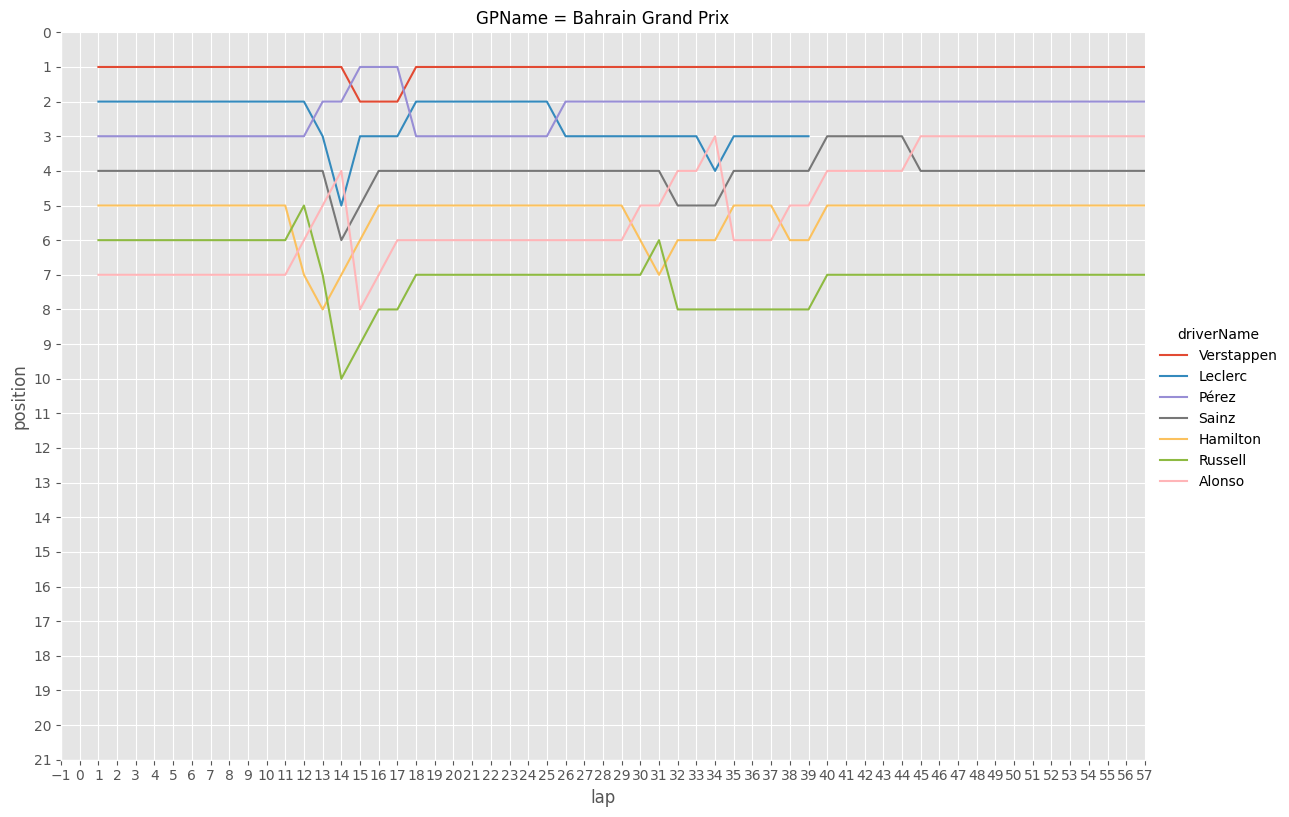

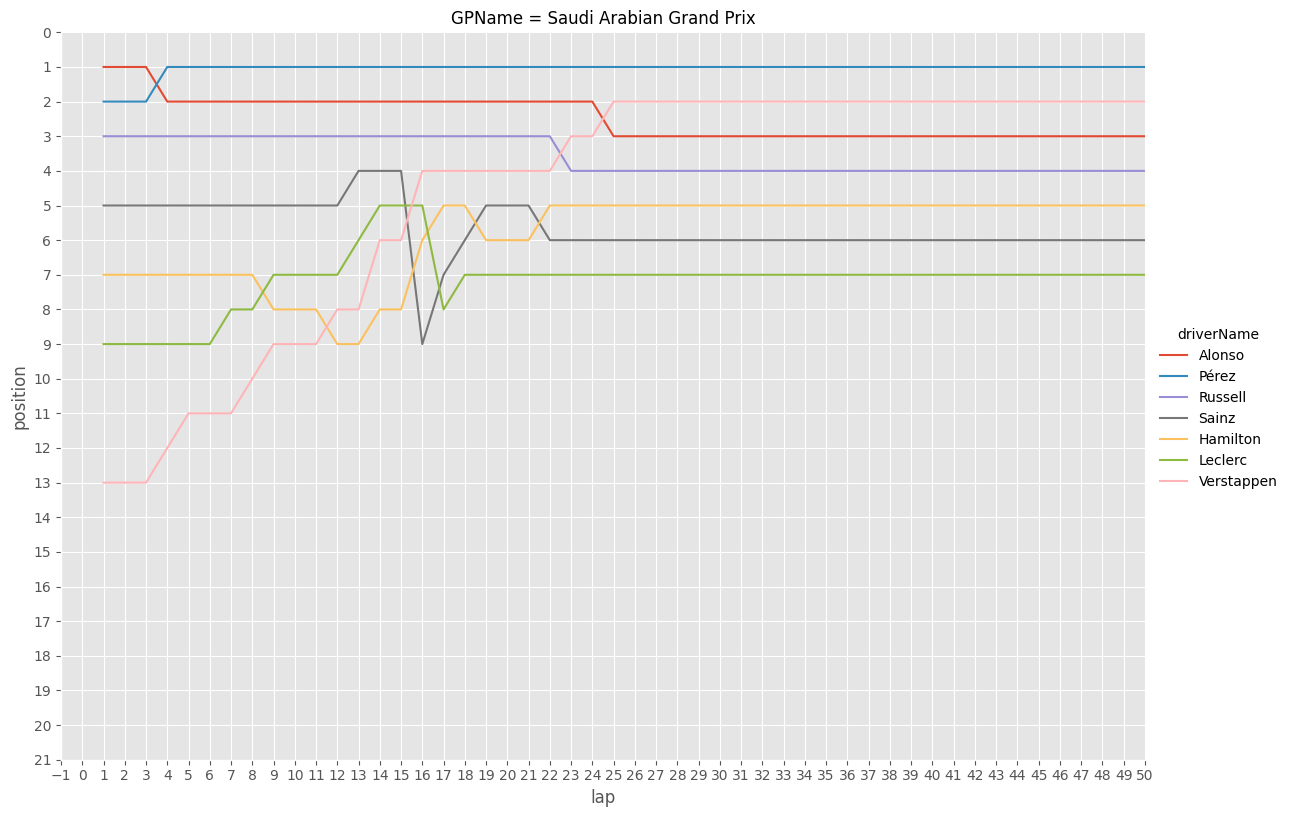

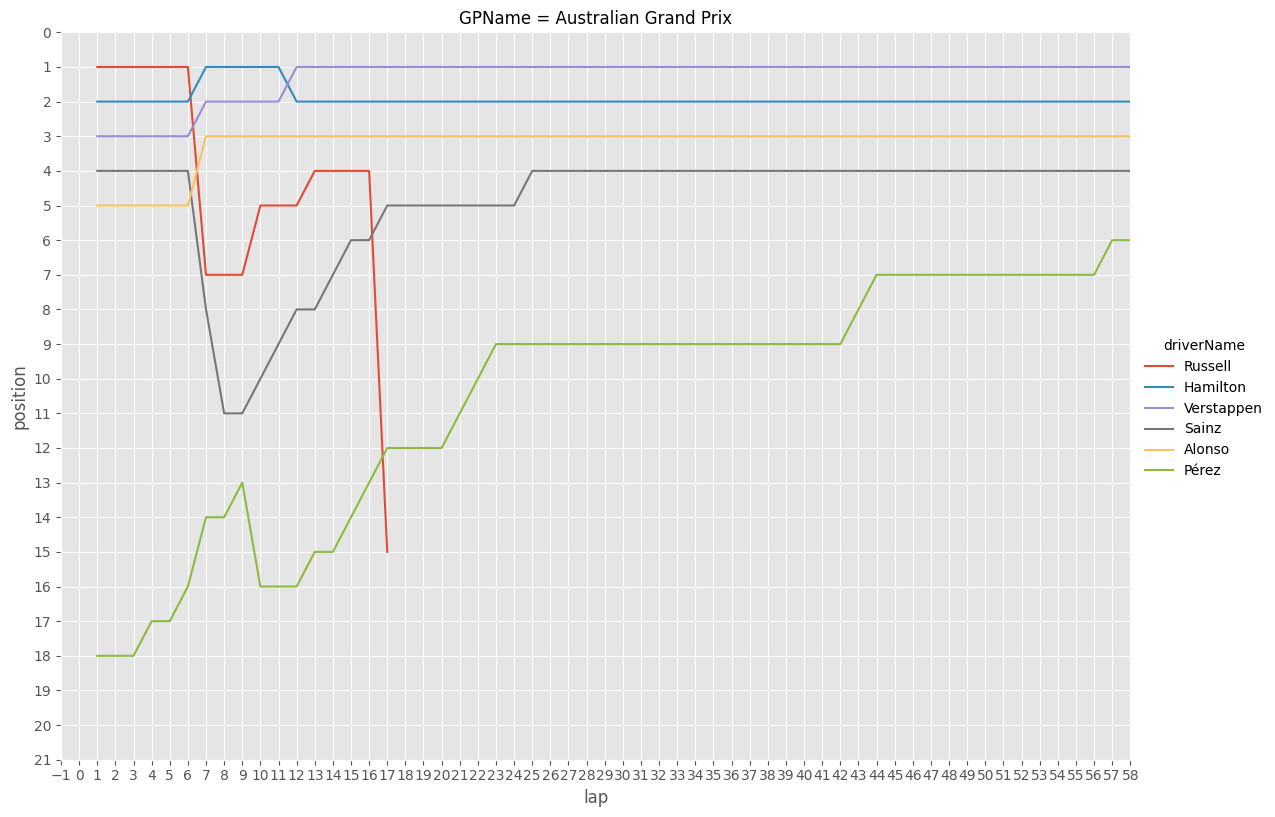

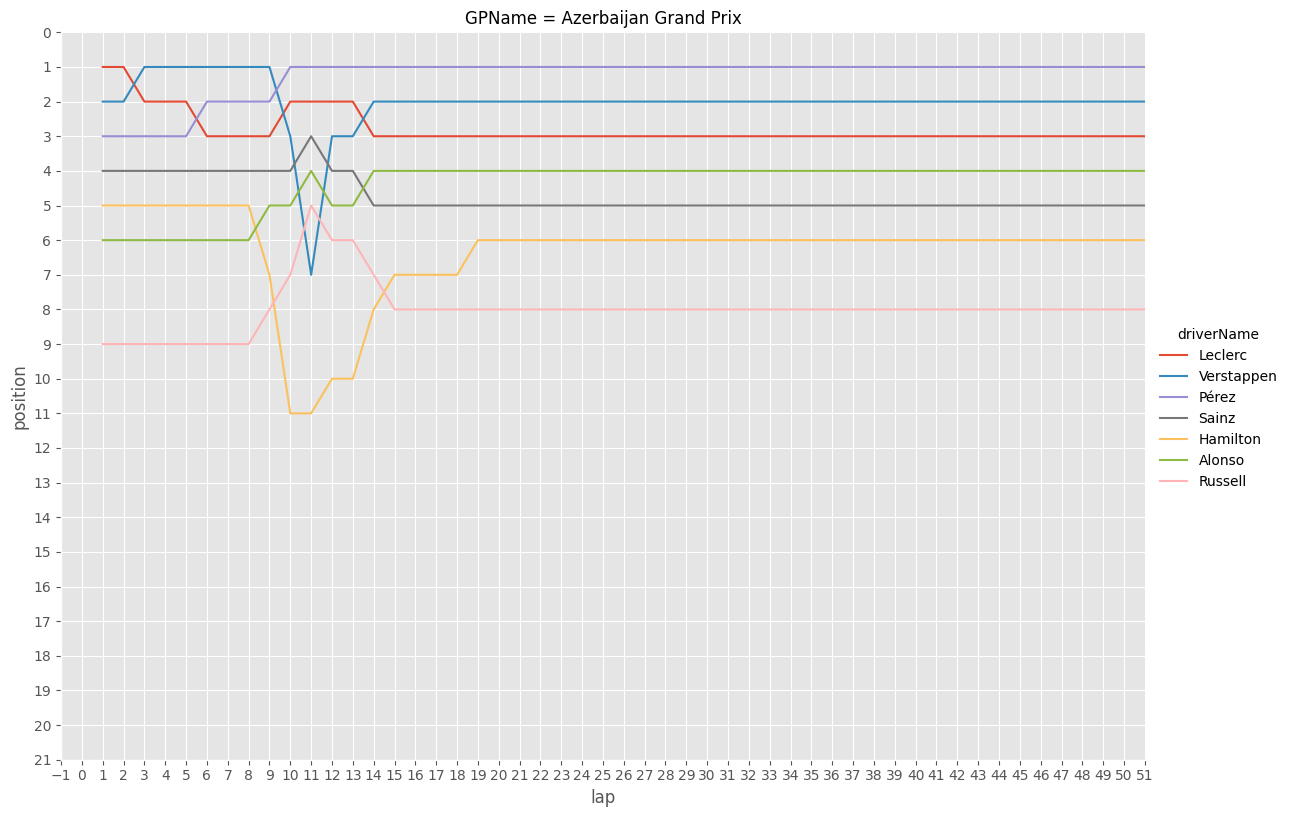

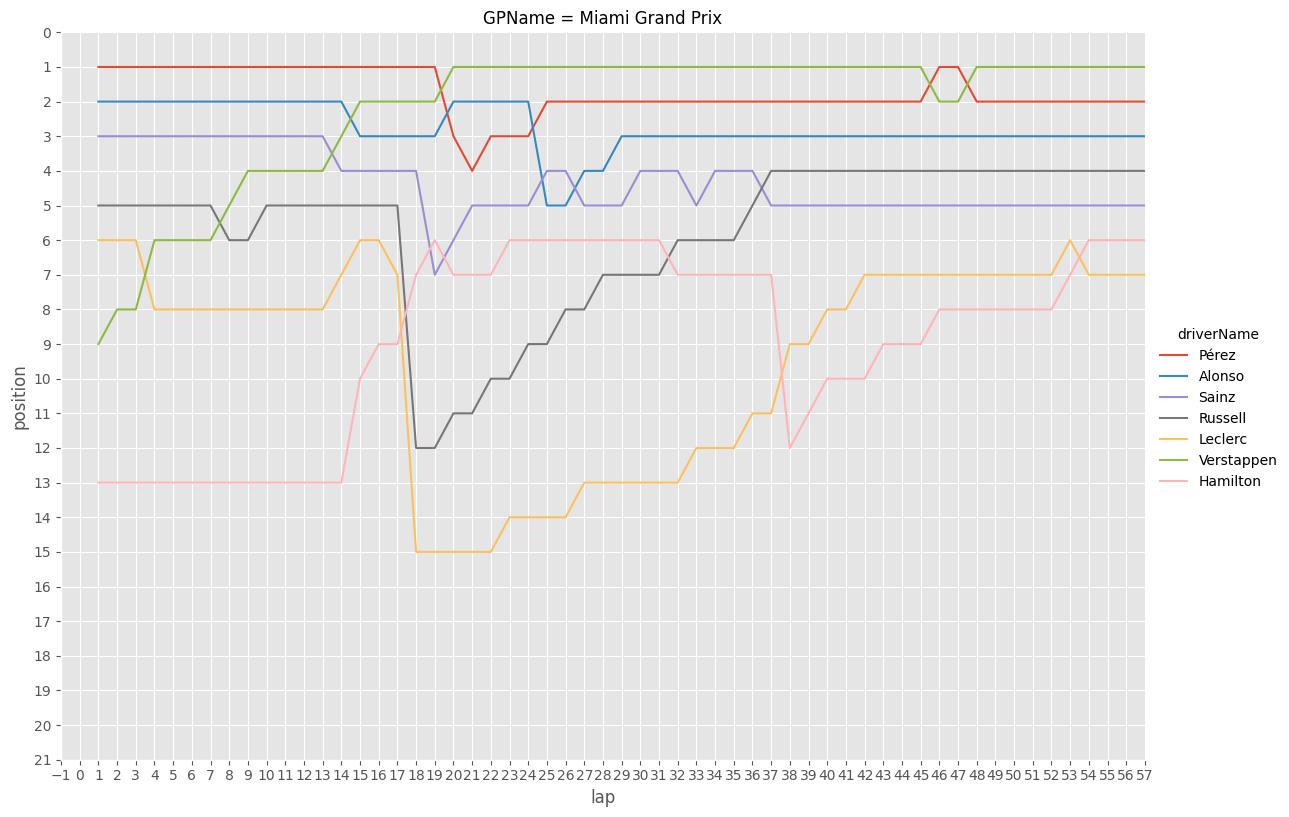

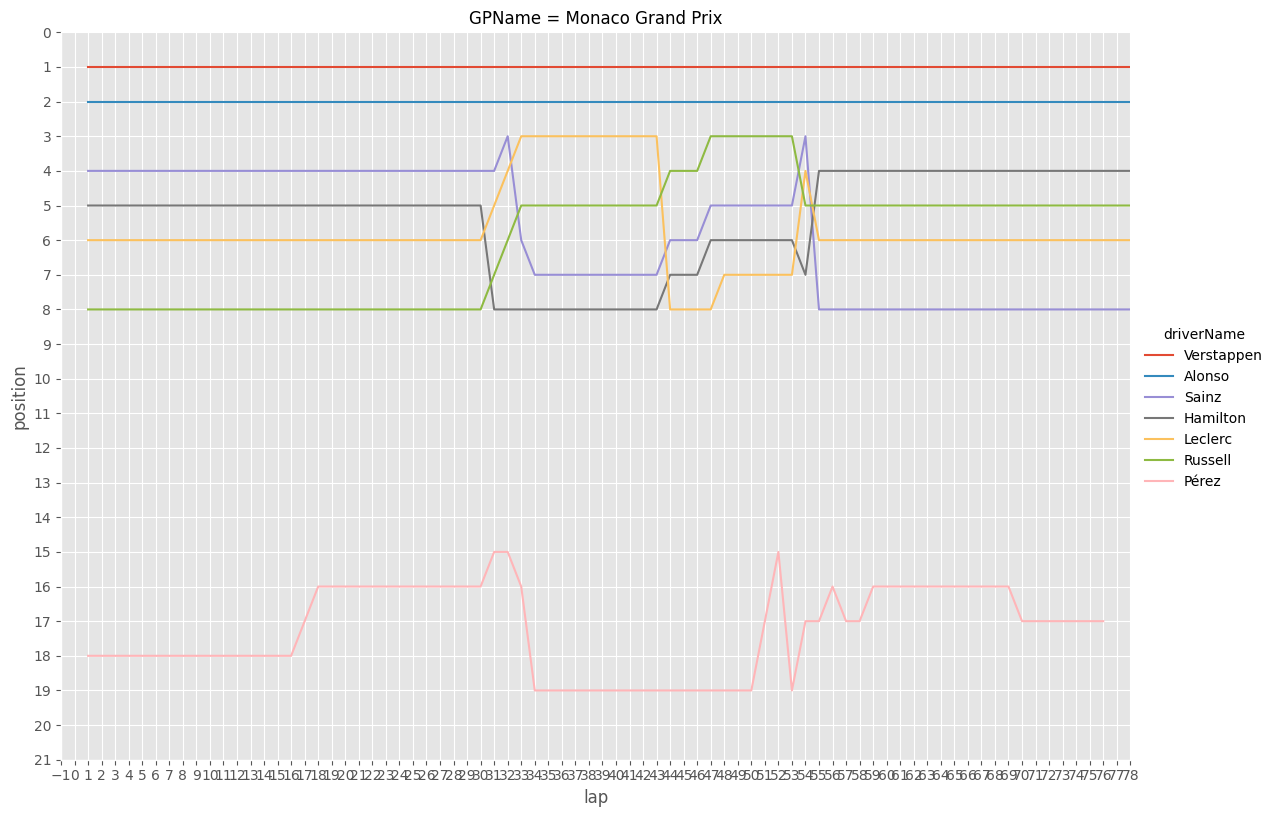

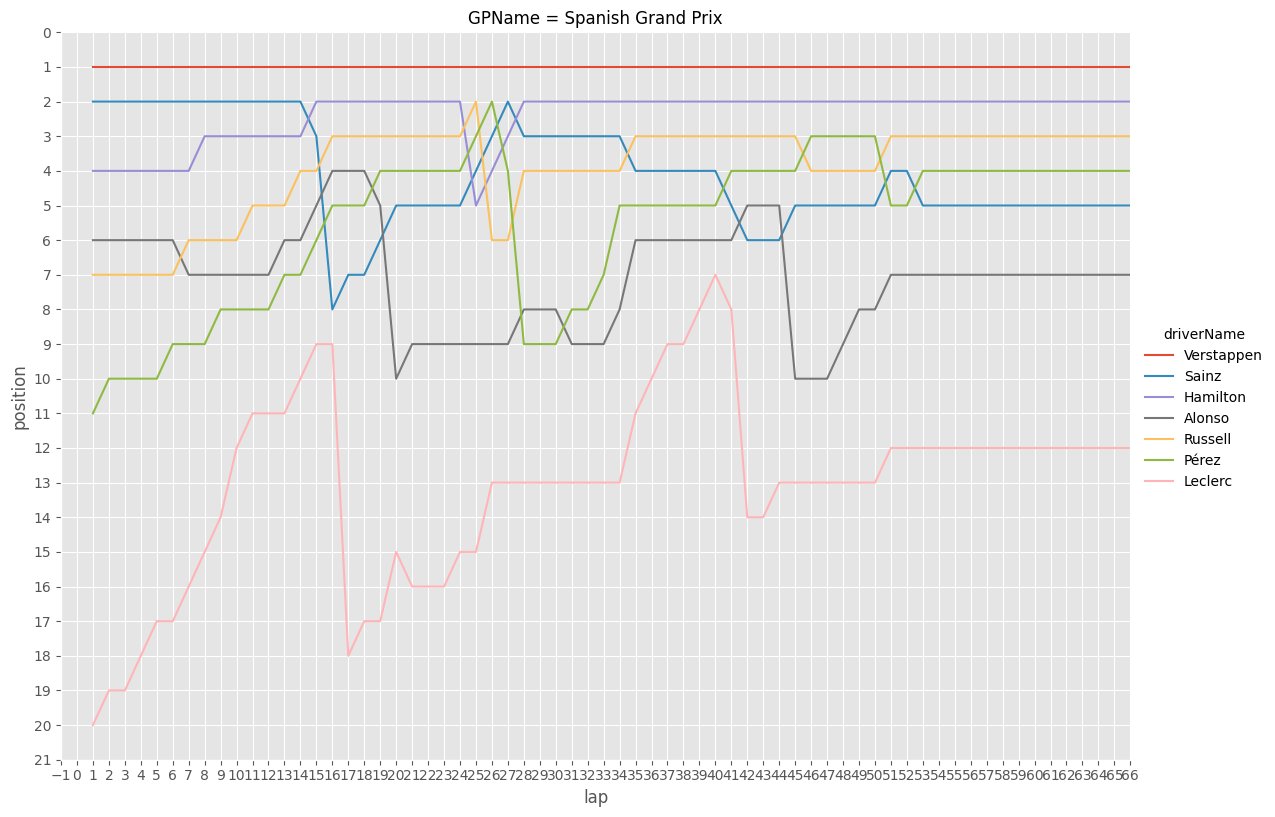

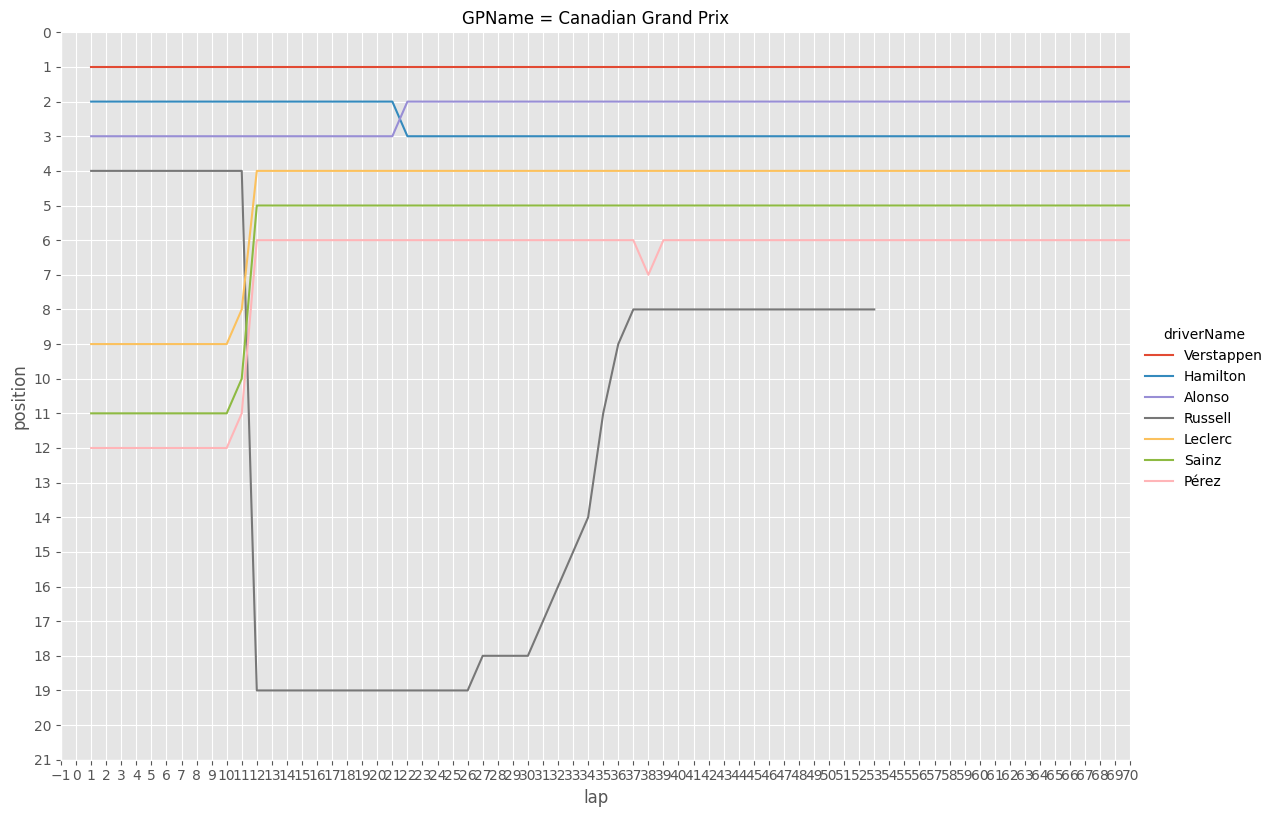

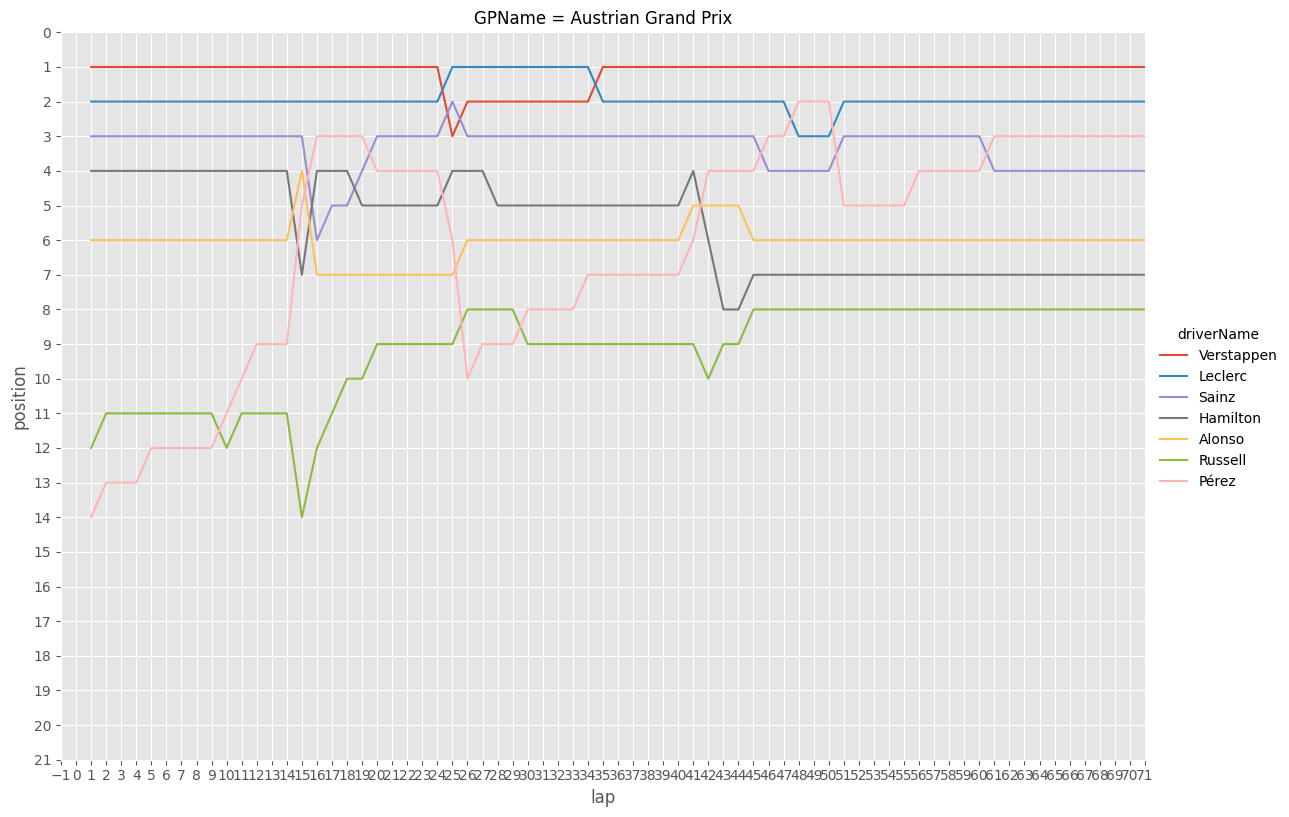

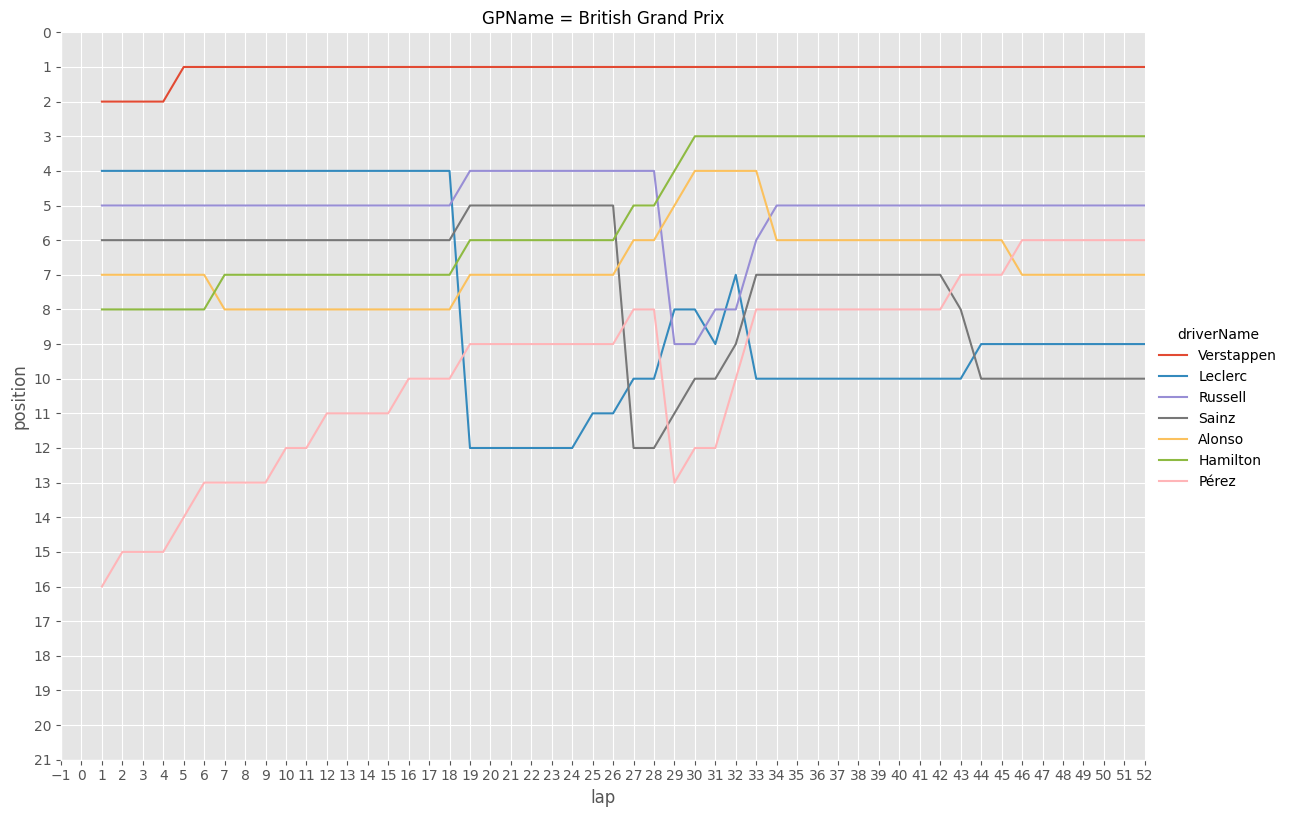

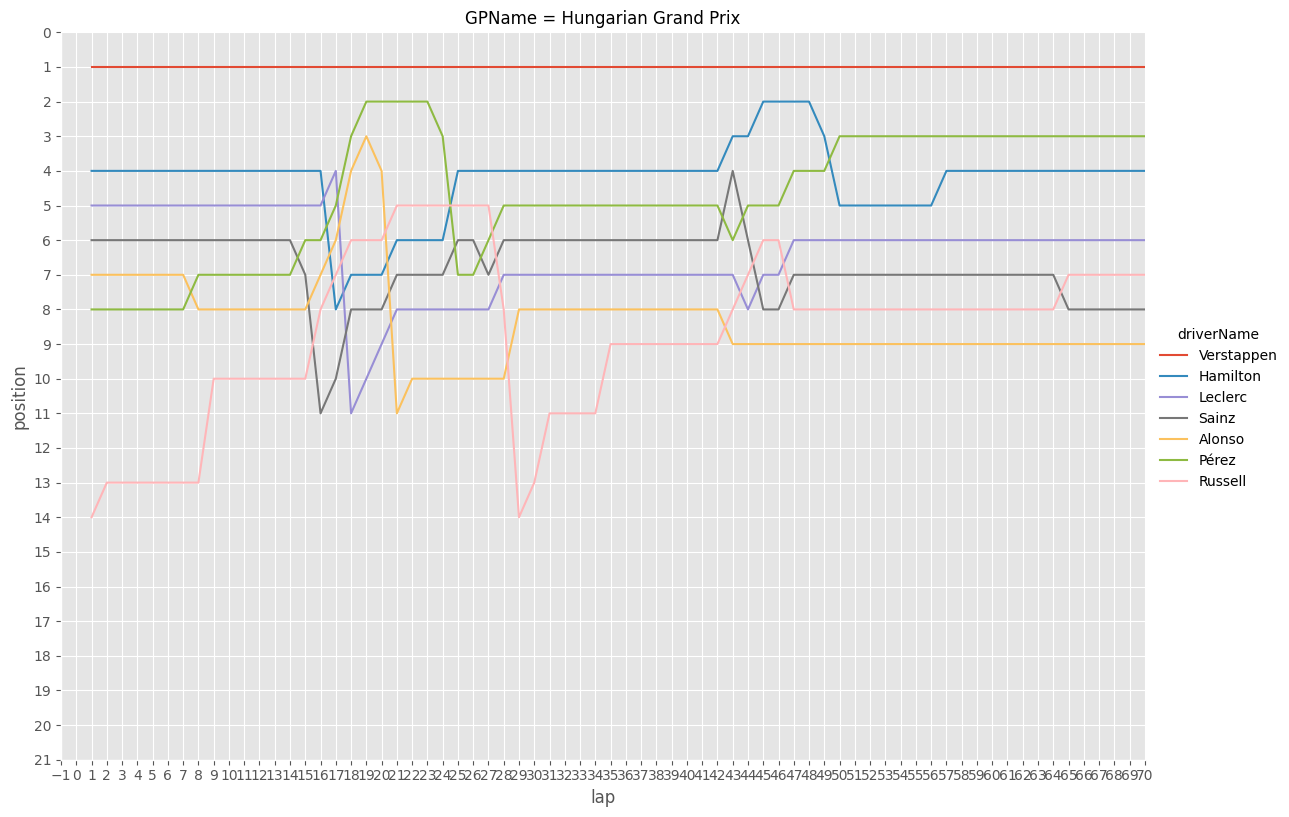

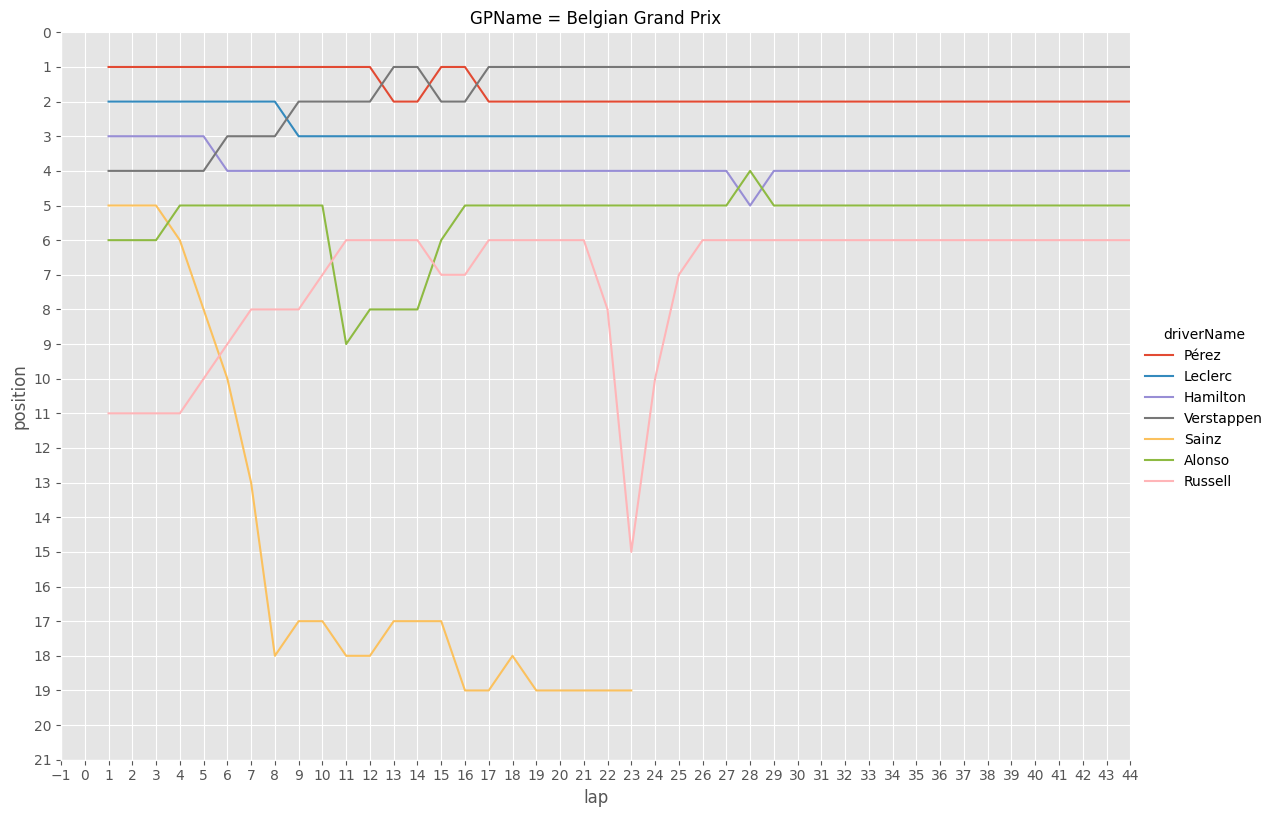

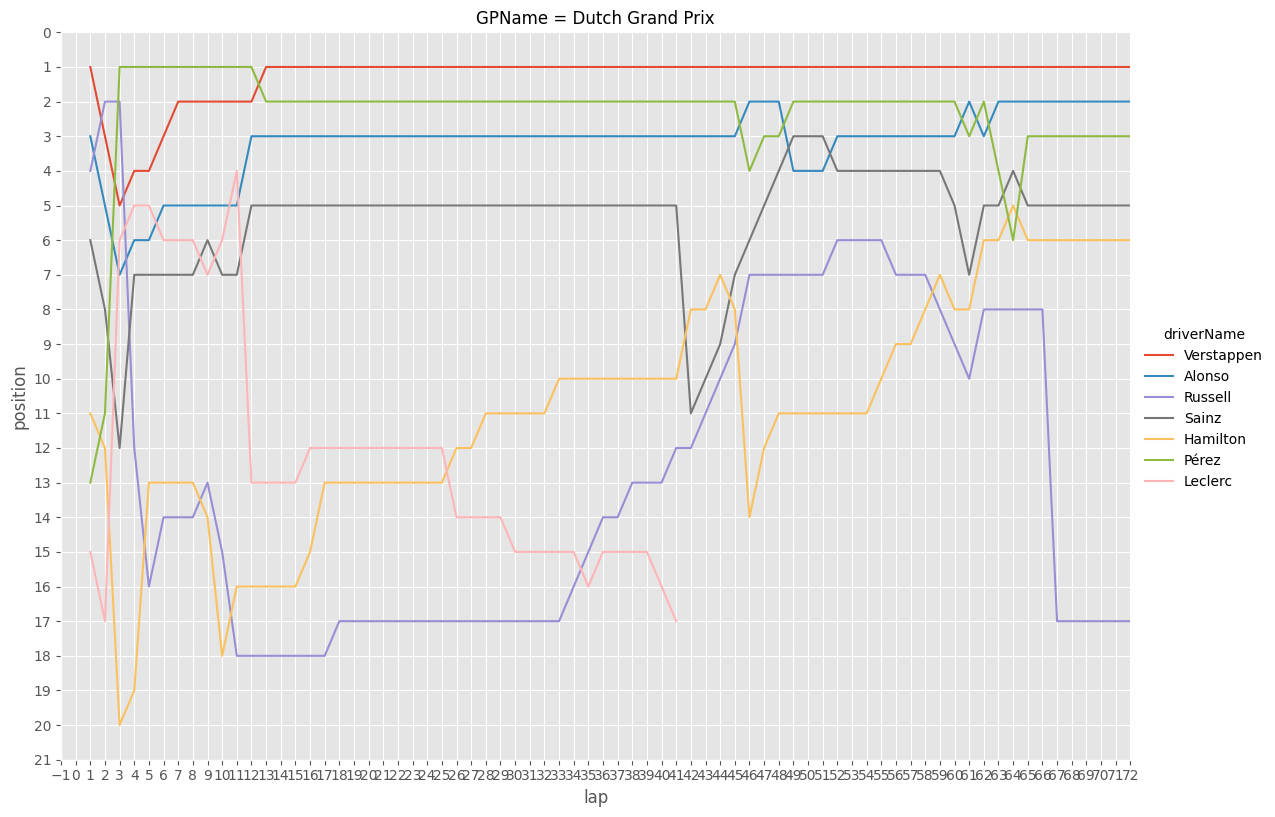

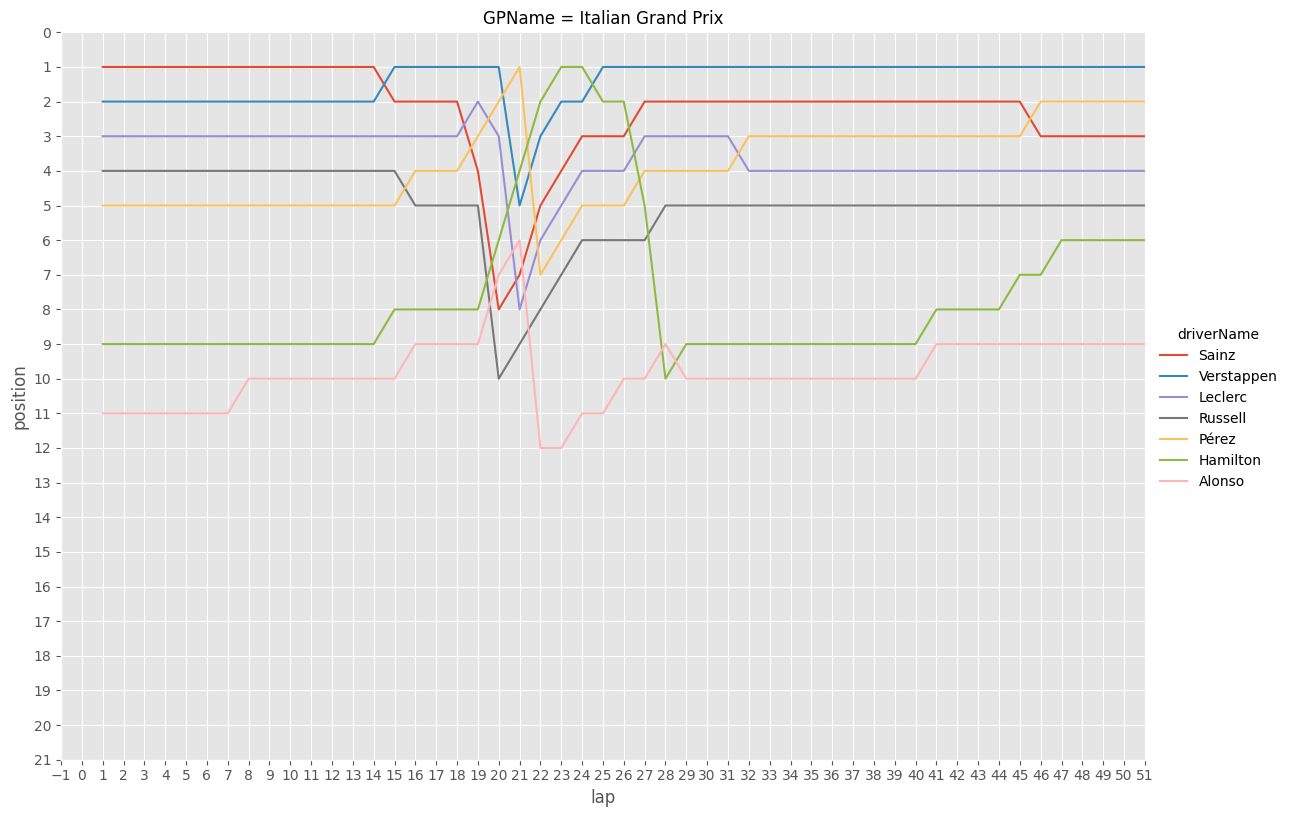

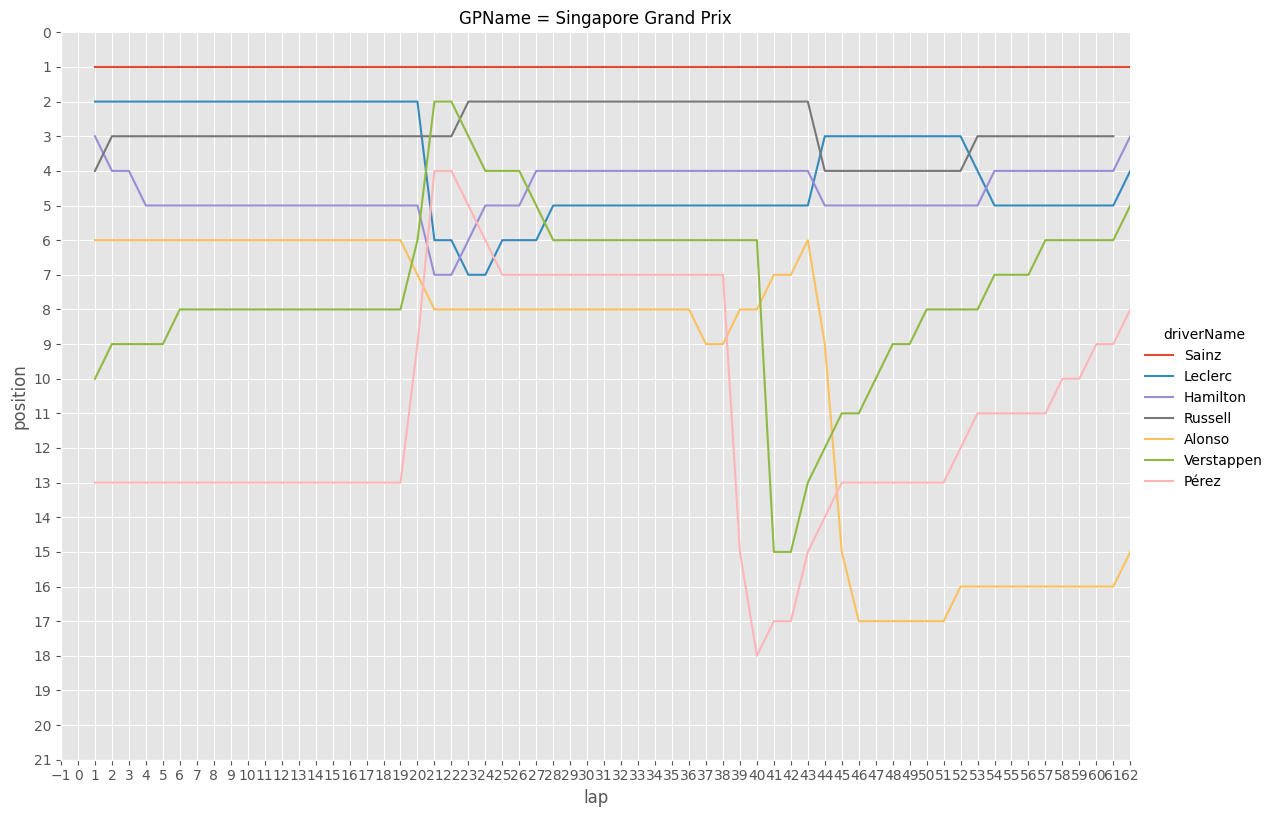

In [36]:
for x in races:
    df_GPGB=df_laptime[((df_laptime['raceId']==x) & ((df_laptime['driverName']=='Pérez') | (df_laptime['driverName']=='Sainz') | (df_laptime['driverName']=='Verstappen') | (df_laptime['driverName']=='Leclerc') | (df_laptime['driverName']=='Hamilton') | (df_laptime['driverName']=='Russell') | (df_laptime['driverName']=='Alonso') ))]
    
    g=sns.relplot(x='lap',y='position',data=df_GPGB, kind='line',hue='driverName',col='GPName',height=8.27, aspect=11.7/8.27)
    g.set(ylim=(21, 0))
    g.set(xlim=(-1, df_GPGB.lap.max()))
    for ax in g.axes.flat:
        ax.yaxis.set_major_locator(MultipleLocator(1))

    for ax in g.axes.flat:
        ax.xaxis.set_major_locator(MultipleLocator(1))    

    plt.show()
    

In [37]:
standing=pd.read_csv('driver_standings.csv',encoding='utf-8',sep=',')

In [38]:
standing['driverName']=standing['driverId'].map(df_drivers.set_index('driverId')['surname'])

In [39]:
standing=standing[(standing['raceId']==standing['raceId'].max())]

In [40]:
standing=standing.sort_values(by='points')

In [41]:
standing

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverName
34173,72289,1113,856,0.0,21,21,0,de Vries
34175,72287,1113,858,0.0,20,20,0,Sargeant
34188,72296,1113,817,0.0,22,22,0,Ricciardo
34189,72297,1113,859,2.0,19,19,0,Lawson
34174,72288,1113,825,3.0,18,18,0,Magnussen
...,...,...,...,...,...,...,...,...
34183,72279,1113,832,142.0,5,5,1,Sainz
34184,72278,1113,4,170.0,4,4,0,Alonso
34182,72280,1113,1,180.0,3,3,0,Hamilton
34185,72277,1113,815,223.0,2,2,2,Pérez


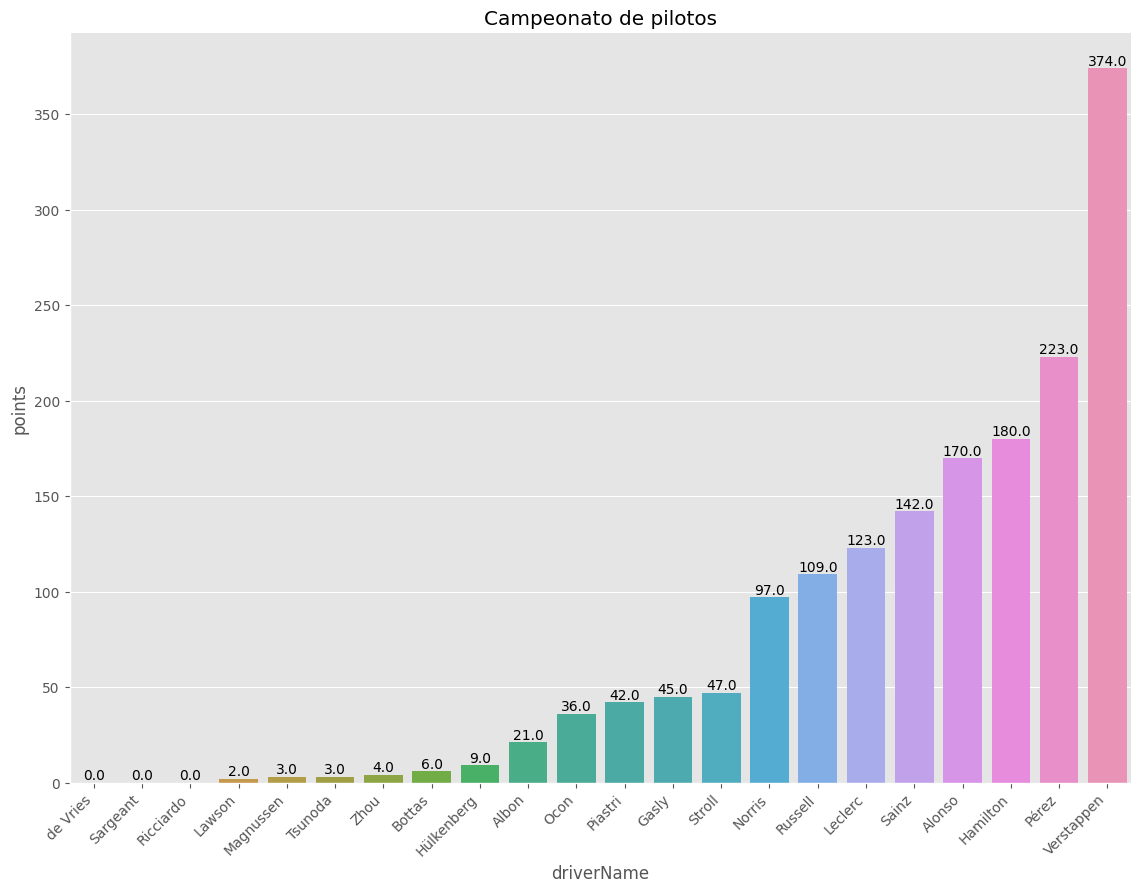

In [42]:
g= sns.catplot(x='driverName',y='points',data=standing, height=8.27, aspect=1.41,kind='bar',ci=None).set(title='Campeonato de pilotos')
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
g.set_xticklabels(rotation=45, horizontalalignment='right')

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() / 1):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


plt.show()

In [43]:
standing=standing.sort_values(by='wins')

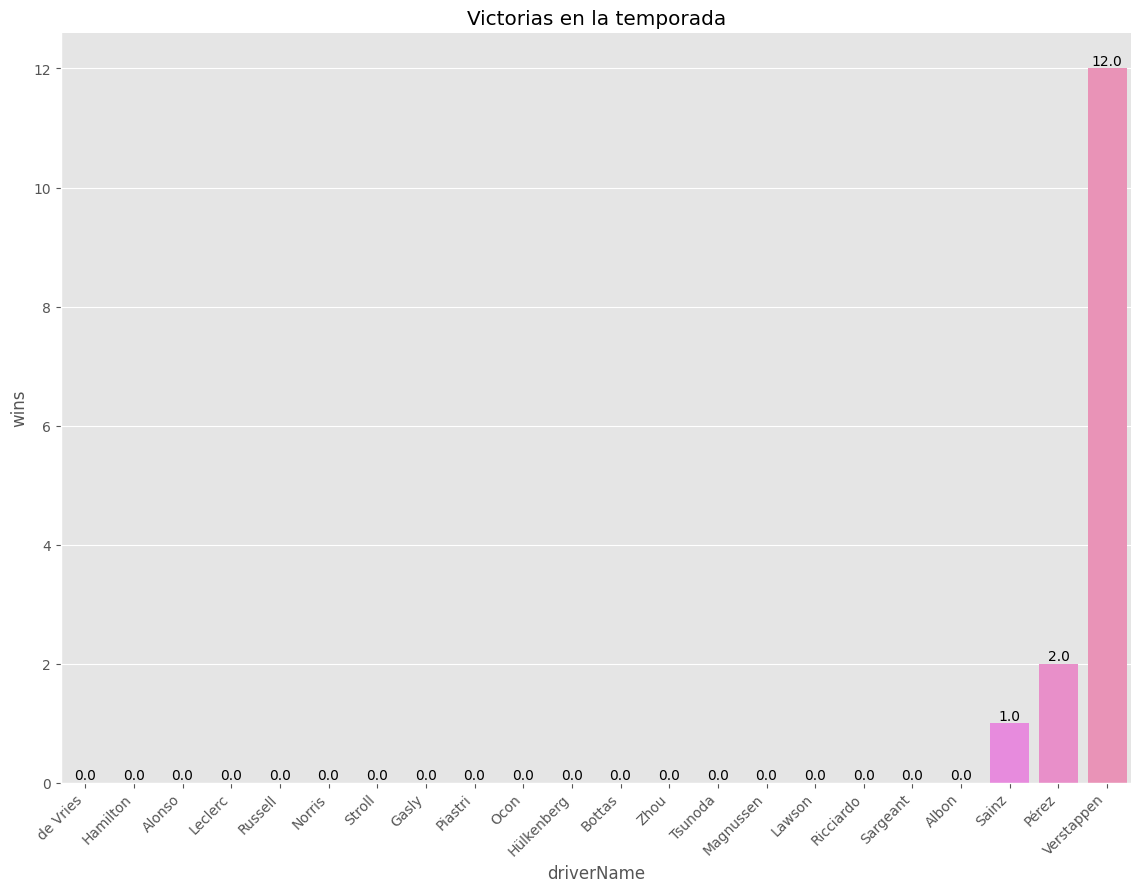

In [44]:
g= sns.catplot(x='driverName',y='wins',data=standing, height=8.27, aspect=1.41,kind='bar',ci=None).set(title='Victorias en la temporada')
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
g.set_xticklabels(rotation=45, horizontalalignment='right')

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() / 1):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


plt.show()

In [45]:
standingConstructors=pd.read_csv('constructor_standings.csv',encoding='utf-8',sep=',')

In [46]:
standingConstructors

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13076,28598,1113,214,81.0,6,6,0
13077,28599,1113,3,21.0,7,7,0
13078,28600,1113,213,5.0,10,10,0
13079,28601,1113,210,12.0,8,8,0


In [47]:
standingConstructors['Equipo']=standingConstructors['constructorId'].map(df_constructor.set_index('constructorId')['name'])

In [48]:
standingConstructors

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Equipo
0,1,18,1,14.0,1,1,1,McLaren
1,2,18,2,8.0,3,3,0,BMW Sauber
2,3,18,3,9.0,2,2,0,Williams
3,4,18,4,5.0,4,4,0,Renault
4,5,18,5,2.0,5,5,0,Toro Rosso
...,...,...,...,...,...,...,...,...
13076,28598,1113,214,81.0,6,6,0,Alpine F1 Team
13077,28599,1113,3,21.0,7,7,0,Williams
13078,28600,1113,213,5.0,10,10,0,AlphaTauri
13079,28601,1113,210,12.0,8,8,0,Haas F1 Team


In [49]:
standingConstructors=standingConstructors[(standingConstructors['raceId']==standingConstructors['raceId'].max())]

In [50]:
standingConstructors=standingConstructors.sort_values(by='points')

In [51]:
standingConstructors

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Equipo
13078,28600,1113,213,5.0,10,10,0,AlphaTauri
13075,28597,1113,51,10.0,9,9,0,Alfa Romeo
13079,28601,1113,210,12.0,8,8,0,Haas F1 Team
13077,28599,1113,3,21.0,7,7,0,Williams
13076,28598,1113,214,81.0,6,6,0,Alpine F1 Team
13080,28602,1113,1,139.0,5,5,0,McLaren
13072,28594,1113,117,217.0,4,4,0,Aston Martin
13073,28595,1113,6,265.0,3,3,1,Ferrari
13074,28596,1113,131,289.0,2,2,0,Mercedes
13071,28593,1113,9,597.0,1,1,14,Red Bull


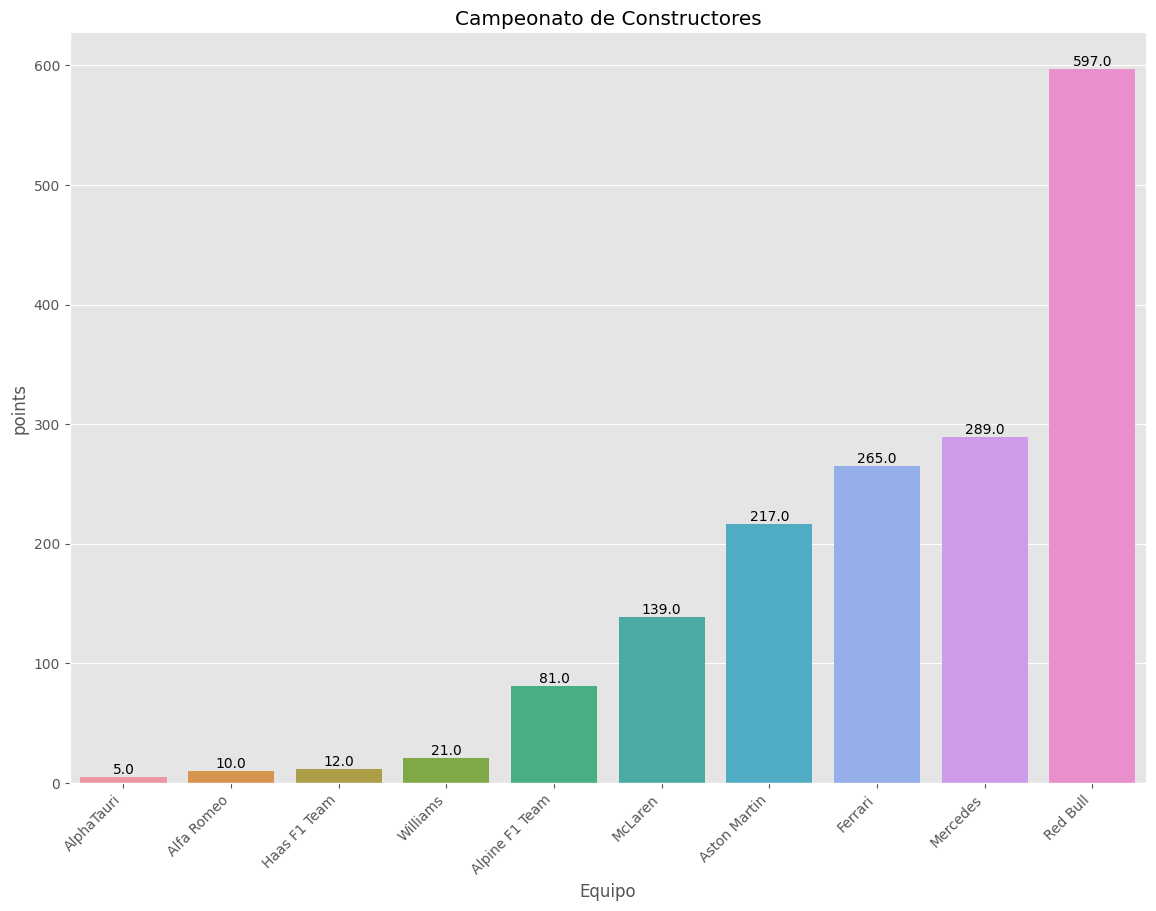

In [52]:
g= sns.catplot(x='Equipo',y='points',data=standingConstructors, height=8.27, aspect=1.41,kind='bar',ci=None).set(title='Campeonato de Constructores')
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
g.set_xticklabels(rotation=45, horizontalalignment='right')

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() / 1):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


plt.show()

In [53]:
standingConstructors=standingConstructors.sort_values(by='wins')

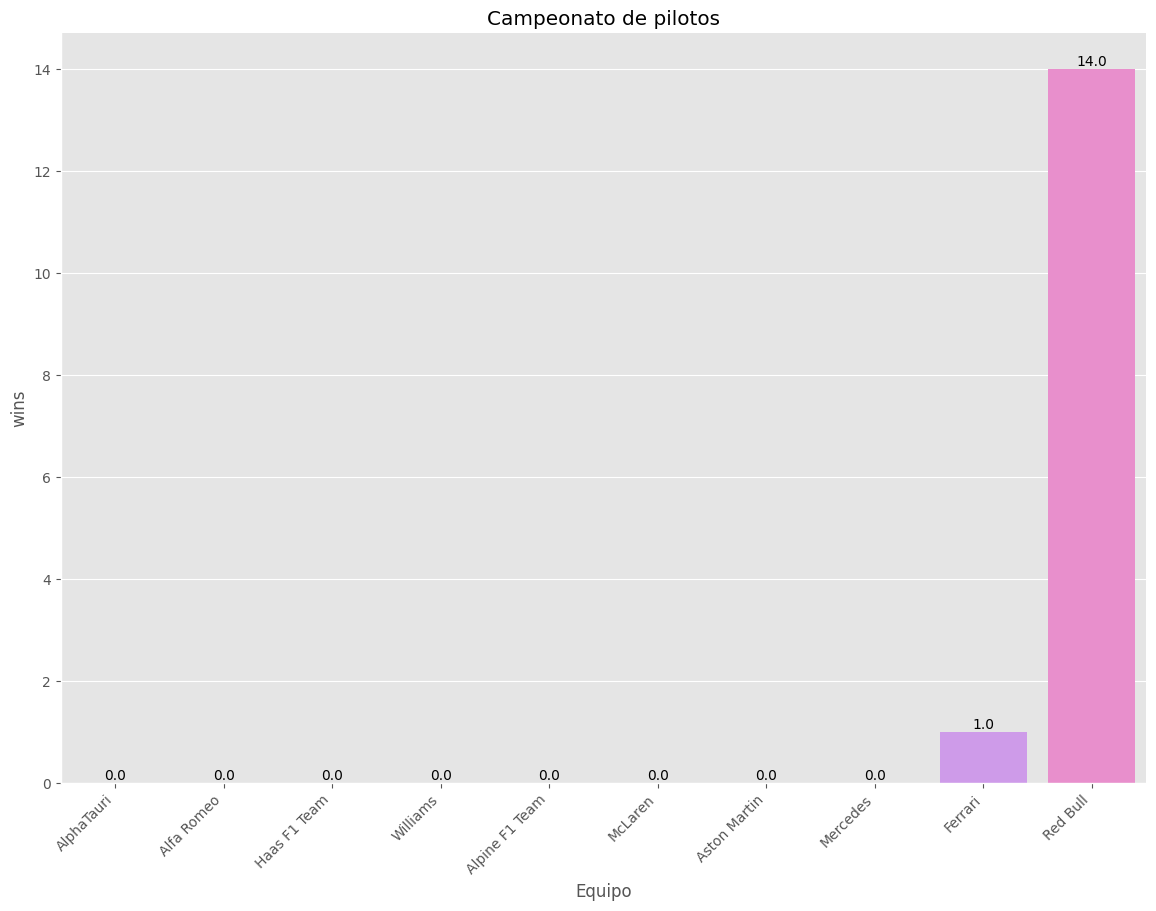

In [54]:
g= sns.catplot(x='Equipo',y='wins',data=standingConstructors, height=8.27, aspect=1.41,kind='bar',ci=None).set(title='Campeonato de pilotos')
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
g.set_xticklabels(rotation=45, horizontalalignment='right')

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() / 1):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')


plt.show()